# Project 08: House Price Predictions using Regression Tree Models in R

### Introduction
1. Data source: https://www.kaggle.com/harrywang/housing
2. Data description:
    1. California Housing Dataset (housing.csv) pertains to houses located in a given California district and provides summary statistics of the houses based on the 1990 cencus data.
    2. Variable description
        * longitude: longtitude of the district
        * latitude: latitude of the district
        * houseing_median_age: median housing age of the district
        * total_rooms: total number of rooms in the district
        * total_bedrooms: total number of bedrooms in the district
        * population: total population in the dstrict
        * households: total number of households, a group of people residing within a home unit in the district
        * median_income: median income of households in the district (measured in tens of thousands USD; *10,000)
        * ocean_proximity: location of houses with regard to the proximity to the ocean
        * median_house_value: median price of houses within a district (measured in USD)
3. Objectvies
    1. To predict the price of houses, which is more than the median of house values, in California in 1990 based on given predictors on the dataset using a regression tree model.
    2. Since the model generated in this project uses the data in 1990, this project has a purely academic attempt that focuses on building regression tree models and explore how regression tree models work.
4. References
     1. Regression Trees: https://uc-r.github.io/regression_trees
     2. Package 'rpart' documentation: https://cran.r-project.org/web/packages/rpart/rpart.pdf

<a id='Table of Contents'></a>    
### Table of Contents
1. Data Preparation & Cleaning
    * Missing Value Treatment
    * Post-Cleaning Data
2. Exploratory Data Analysis (EDA)
    * Graphical Anlaysis
    * Correlation Analysis
3. Model Building: Regression Trees
    * Splitting the data: Training vs. Testing
    * Fitting Regression Tree Models
4. Predictions & Model Evaluation
    * Generating Predictions & Visualization
    * Model Performance Evaluation
5. Tuning
    * Tuning with CP parameter
    * Tuning with Other hyperparameters

## 1. Data Preparation & Cleaning

In [1]:
# Set up the library path for installing packages
.libPaths('C:/Users/james/anaconda3/envs/r-tutorial/Lib/R/library')

In [2]:
# Install required pacakges
# install.packages("tidyverse")

In [48]:
# Load packages
library(data.table)
library(dplyr)
library(magrittr)
library(tidyr)
library(ggplot2)
library(plotly)
library(ggcorrplot)
library(MASS)
library(naniar)
library(skimr)
library(simputation)
library(viridis)
library(caret)
library(rpart)
library(rpart.plot)
library(caTools)
library(tidyverse)

# Packages for geographic visualization
# library(rnaturalearth)
# library(rnaturalearthdata)
# library(cowplot)
# library(ggrepel)
# library(ggspatial)
# library(sf)
# library(maps)
# library(Cairo)
# library(RColorBrewer)
# library(ISLR)

# Suppress warning messages
options(warn = -1)

In [4]:
# Set up a working directory
setwd('C:/Users/james/Desktop/Coding/Kaggle/Housing Price Prediction')

In [5]:
# Import the target dataset: housing.csv
df <- fread("housing.csv")

head(df)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [6]:
# Summary of the dataset
skimr::skim(df)

-- Data Summary ------------------------
                           Values
Name                       df    
Number of rows             20640 
Number of columns          10    
_______________________          
Column type frequency:           
  character                1     
  numeric                  9     
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
# A tibble: 1 x 8
  skim_variable   n_missing complete_rate   min   max empty n_unique whitespace
* <chr>               <int>         <dbl> <int> <int> <int>    <int>      <int>
1 ocean_proximity         0             1     6    10     0        5          0

-- Variable type: numeric ------------------------------------------------------
# A tibble: 9 x 11
  skim_variable      n_missing complete_rate      mean        sd        p0
* <chr>                  <int>         <dbl>     <dbl>     <dbl>     <dbl>
1 longitude                 

### (1) Missing Value Treatment
#### (a) Checking Missing Values & Visualization

In [7]:
# Check columns that contain missing values: total_bedrooms
miss_var_summary(df)

variable,n_miss,pct_miss
total_bedrooms,207,1.002907
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


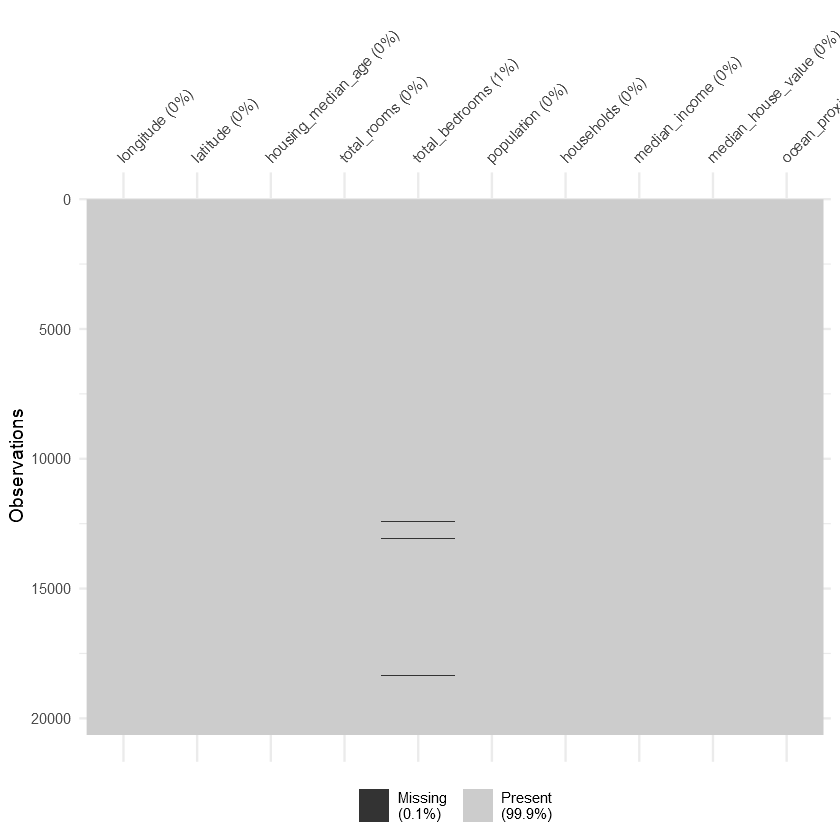

In [8]:
# Visualize missing values
vis_miss(df)

Only total_bedrooms has 207 missing values, which consists of 0.1% of the entire dataset. Even though there are many ways to impute missing values, I will try imputing missing values with two different ways using mean and linear regression.

#### (b) Imputation with Different Methods
##### Imputation with mean

In [9]:
# Impute missing values with the mean and create a nabular table
df_imp_mean <- df %>%
    bind_shadow(only_miss = TRUE) %>%
    impute_mean_at(vars(total_bedrooms)) %>%
    add_label_shadow()

head(df_imp_mean)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_NA,any_missing
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,!NA,Not Missing
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,!NA,Not Missing
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,!NA,Not Missing
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,!NA,Not Missing
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,!NA,Not Missing
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY,!NA,Not Missing


In [10]:
# Check the imputed values: mean
tb_imp_mean <- df_imp_mean %>%
            filter(total_bedrooms_NA == 'NA') %>%
            summarize(total_bedrooms, total_bedrooms_NA)

head(tb_imp_mean)

total_bedrooms,total_bedrooms_NA
537.8706,NA
537.8706,NA
537.8706,NA
537.8706,NA
537.8706,NA
537.8706,NA


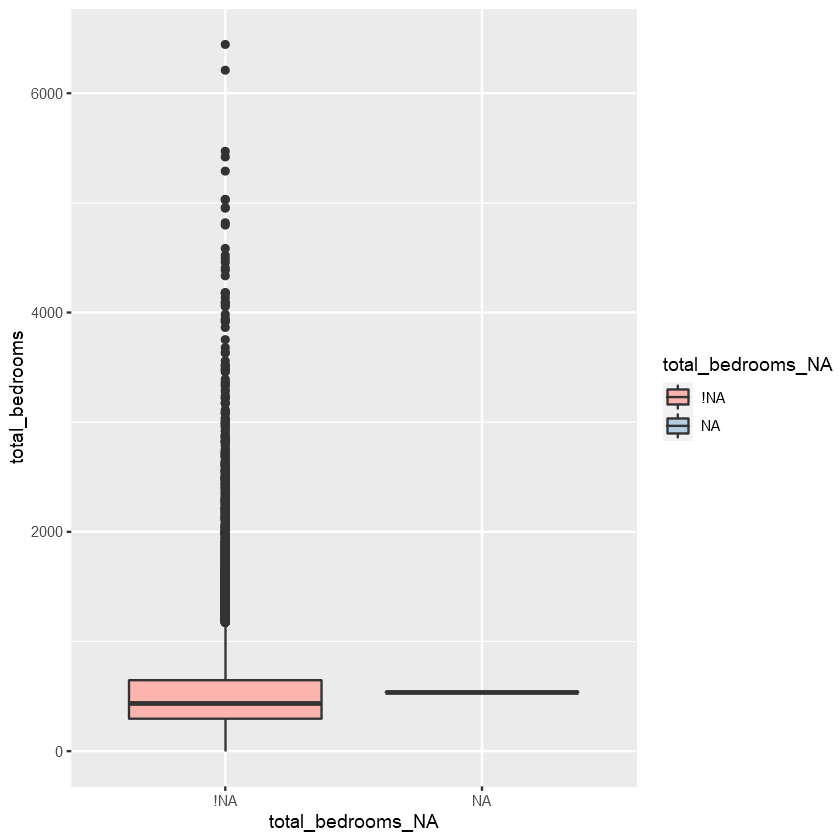

In [11]:
# Evaluate the imputations: mean
p <- ggplot(df_imp_mean, aes(total_bedrooms_NA, total_bedrooms)) +
        geom_boxplot(aes(fill = total_bedrooms_NA)) +
        scale_fill_brewer(palette = "Pastel1")

p
# fig <- ggplotly(p)
# fig

The mean/median value of the column total_bedrooms is 537.87, which is slightly larger than its median value, 435.

##### Impuation with linear regression

In [12]:
# Impute the missing values using linear regresion and create a nabular table
df_imp_lm <- df %>%
                bind_shadow(only_miss = TRUE) %>%
                add_label_shadow() %>%
                impute_lm(total_bedrooms ~ households + total_rooms)

head(df_imp_lm)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_NA,any_missing
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,!NA,Not Missing
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,!NA,Not Missing
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,!NA,Not Missing
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,!NA,Not Missing
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,!NA,Not Missing
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY,!NA,Not Missing


In [13]:
# Check the imputed values using linear regression
tb_imp_lm <- df_imp_lm %>%
                filter(total_bedrooms_NA == "NA") %>%
                summarize(total_bedrooms, total_bedrooms_NA)

head(tb_imp_lm)

total_bedrooms,total_bedrooms_NA
237.5968,NA
264.0231,NA
1315.6725,NA
160.3366,NA
168.2021,NA
615.0454,NA


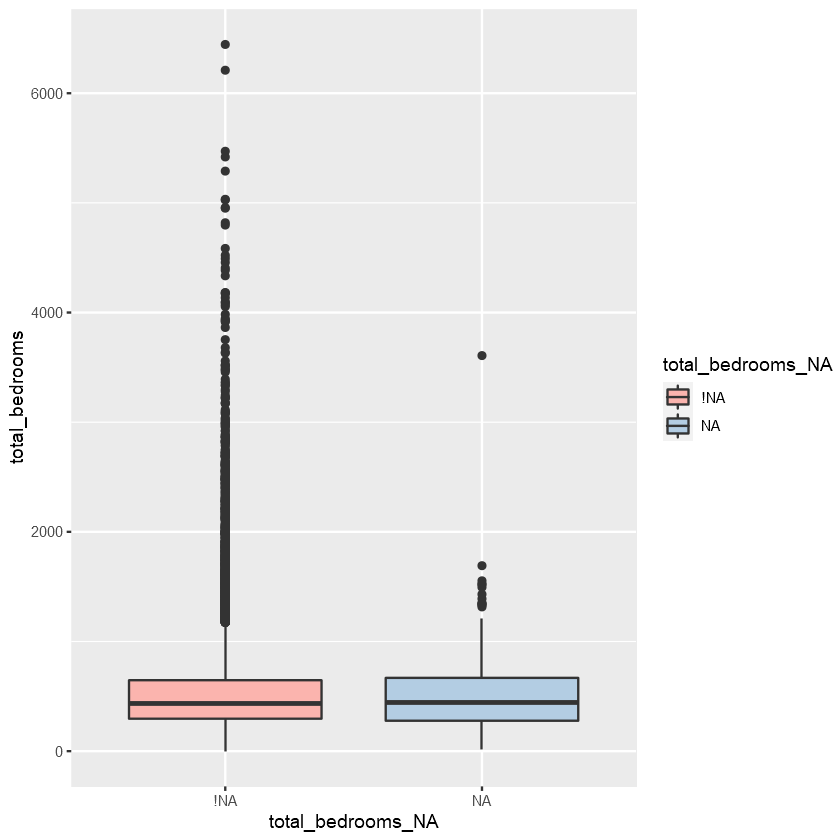

In [14]:
# Evaluate the imputations: linear regression
p1 <- ggplot(df_imp_lm, aes(total_bedrooms_NA, total_bedrooms)) +
    geom_boxplot(aes(fill = total_bedrooms_NA)) +
    scale_fill_brewer(palette = "Pastel1")

p1
# fig <- ggplotly(p1)
# fig

#### Observations
1. As seen above, imputed values are different from each other because these values are resulted from linear regression based on the predictors, households and total_rooms, which are highly strongly related to total_bedrooms.
    * Refer to correlation coefficients below(total_bedrooms - households: 1.0, total_bedrooms - total_rooms: 0.9) 
2. The median of imputed values is 442.68 which is very close to 435.

#### (c) Comparison of Imputation Models

In [15]:
# Compare imputation models: mean vs linear regression
bound_mdl <- bind_rows(mean = df_imp_mean, lm = df_imp_lm, .id = "imp_model") 

head(bound_mdl)

imp_model,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_NA,any_missing
mean,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,!NA,Not Missing
mean,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,!NA,Not Missing
mean,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,!NA,Not Missing
mean,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,!NA,Not Missing
mean,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,!NA,Not Missing
mean,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY,!NA,Not Missing


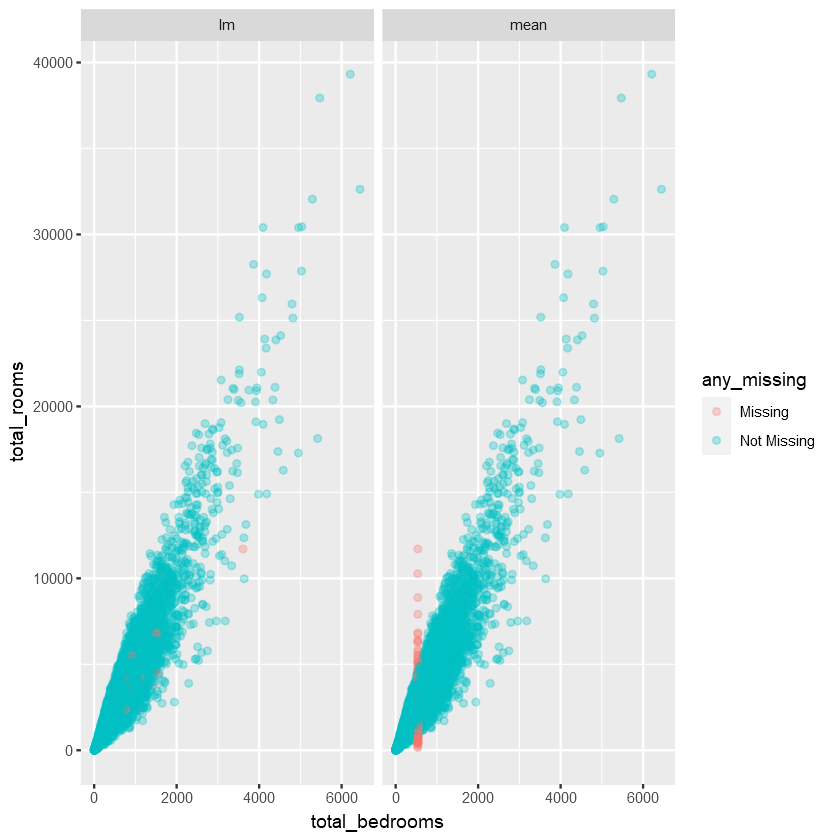

In [16]:
# Plot missing values in both models
ggplot(bound_mdl, aes(total_bedrooms, total_rooms, color = any_missing)) +
        geom_point(alpha = 0.3) +
        facet_wrap(~ imp_model)

# fig <- ggplotly(p4)
# fig

In [17]:
# Gather chosen variables to explore imputations across these two models
bound_mdl_gather <- bound_mdl %>%
    dplyr::select(total_bedrooms, any_missing, imp_model) %>%
    gather(key = "variable", value = "value", -any_missing, -imp_model)

head(bound_mdl_gather)

any_missing,imp_model,variable,value
Not Missing,mean,total_bedrooms,129
Not Missing,mean,total_bedrooms,1106
Not Missing,mean,total_bedrooms,190
Not Missing,mean,total_bedrooms,235
Not Missing,mean,total_bedrooms,280
Not Missing,mean,total_bedrooms,213


<ggproto object: Class FacetWrap, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetWrap, Facet, gg>

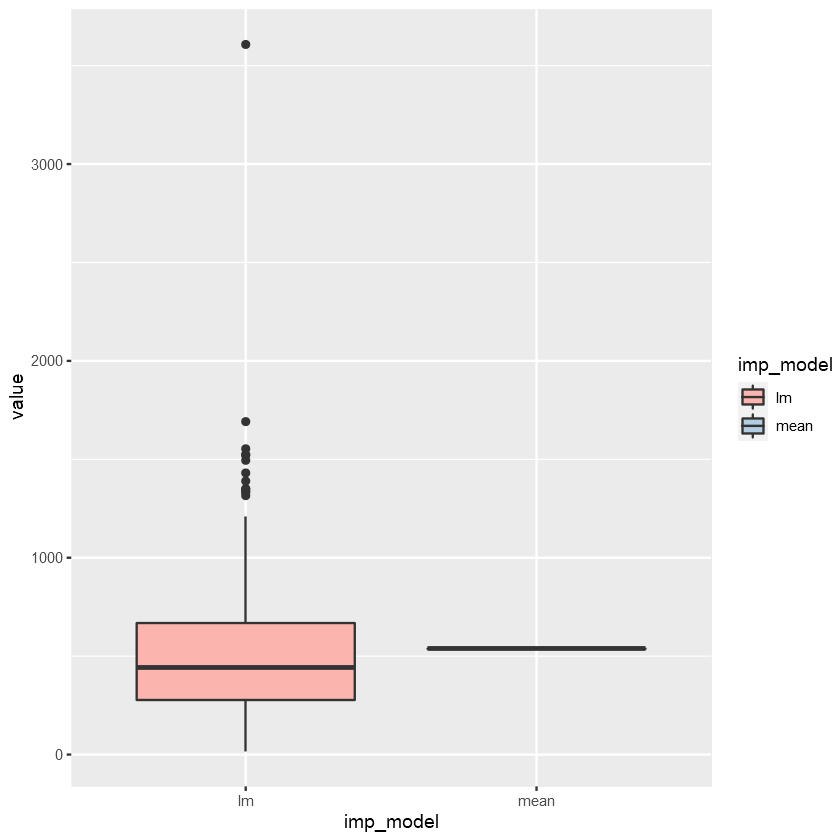

In [18]:
# Plot imputed values in each model for comparison
p5 <- bound_mdl_gather %>%
        filter(any_missing == "Missing") %>%
        ggplot(aes(imp_model, value)) +
        geom_boxplot(aes(fill = imp_model)) +
        scale_fill_brewer(palette = "Pastel1")
        facet_wrap(~ variable)

p5
# fig <- ggplotly(p5)
# fig

#### Observations
1. In the faceted scatterplot, we can observe the imputed values by linear regression also are spread within the range of the majority of not-missing values that go upward. However, since the imputed values by the mean are all idential, they compose a vertical line. 
2. Since the median of the imputed values by linear regression, 442.68, is relatively smaller than the imputed values by the mean, 537.87 and much closer to the median of the not-missing values of total_bedrooms.
3. In conclusion, I will replace the missing values with the imputed values by linear regression.

### (2) Post-Cleaning Data

In [19]:
# Reorganize the main dataset and drop unnecessary columns
df_hp <- df_imp_lm <- subset(df_imp_lm, select = -c(total_bedrooms_NA, any_missing))

head(df_hp)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


## 2. Exploratory Data Analysis (EDA)
### (1) Graphical Analysis

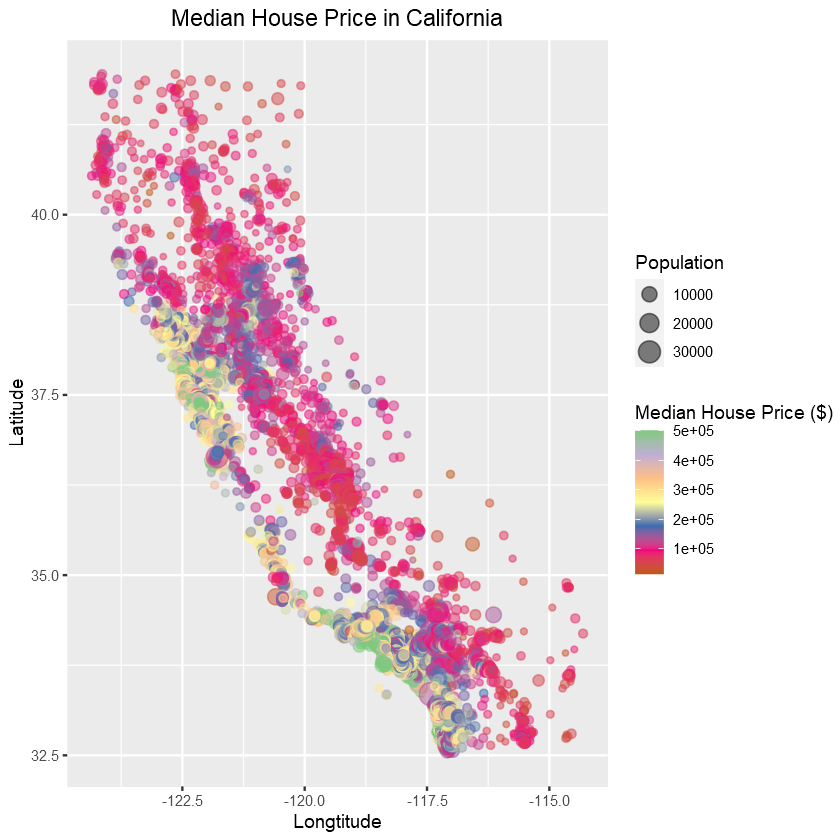

In [20]:
# Plot median_house_value with logitutde and latitude
p6 <- ggplot(df_hp, aes(longitude, latitude, color = median_house_value)) +
        geom_point(aes(size = population), alpha = 0.5) +
        labs(x = "Longtitude", y = "Latitude", title = "Median House Price in California", 
             color = "Median House Price ($)", size = "Population") +
        theme(plot.title = element_text(hjust = 0.5)) +
        scale_color_distiller(palette = "Accent")

p6
# fig <- ggplotly(p6)
# fig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


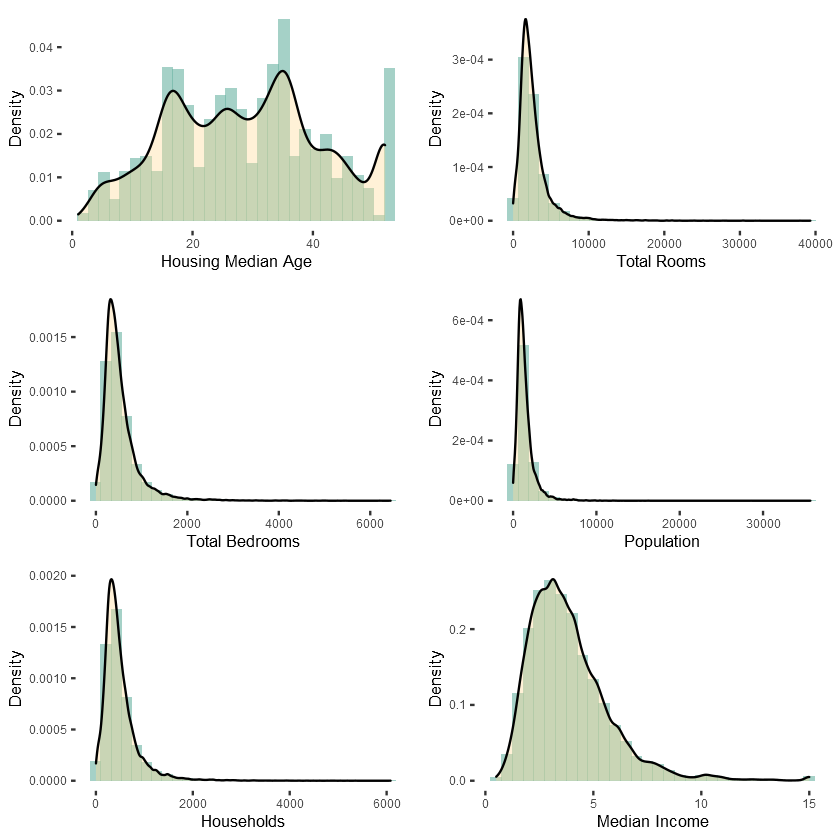

In [21]:
# Load a package
library(ggpubr)
# theme_set(theme_pubclean())  

# Plot the distribution of each variable with a histogram and a density plot
hma <- ggplot(df_hp, aes(housing_median_age)) + geom_histogram(aes(y = ..density..), alpha = 0.6, fill = "#69b3a2") +
        geom_density(fill = "#FFDC9BFF", alpha = 0.4) +
        theme(panel.background = element_rect(fill = '#ffffff'), 
              axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7),
              axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10)) +
        labs(x = "Housing Median Age", y = "Density")

tr <- ggplot(df_hp, aes(total_rooms)) + geom_histogram(aes(y = ..density..), alpha = 0.6, fill = "#69b3a2") +
        geom_density(fill = "#FFDC9BFF", alpha = 0.4) +
        theme(panel.background = element_rect(fill = '#ffffff'), 
              axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7),
              axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10)) +
        labs(x = "Total Rooms", y = "Density")

tb <- ggplot(df_hp, aes(total_bedrooms)) + geom_histogram(aes(y = ..density..), alpha = 0.6, fill = "#69b3a2") +
        geom_density(fill = "#FFDC9BFF", alpha = 0.4) +
        theme(panel.background = element_rect(fill = '#ffffff'), 
              axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7),
              axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10)) +
        labs(x = "Total Bedrooms", y = "Density")

pop <- ggplot(df_hp, aes(population)) + geom_histogram(aes(y = ..density..), alpha = 0.6, fill = "#69b3a2") +
        geom_density(fill = "#FFDC9BFF", alpha = 0.4) +
        theme(panel.background = element_rect(fill = '#ffffff'), 
              axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7),
              axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10)) +
        labs(x = "Population", y = "Density")

h <- ggplot(df_hp, aes(households)) + geom_histogram(aes(y = ..density..), alpha = 0.6, fill = "#69b3a2") +
        geom_density(fill = "#FFDC9BFF", alpha = 0.4) +
        theme(panel.background = element_rect(fill = '#ffffff'), 
              axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7),
              axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10)) +
        labs(x = "Households", y = "Density")

mi <- ggplot(df_hp, aes(median_income)) + geom_histogram(aes(y = ..density..), alpha = 0.6, fill = "#69b3a2") +
        geom_density(fill = "#FFDC9BFF", alpha = 0.4) +
        theme(panel.background = element_rect(fill = '#ffffff'), 
              axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7),
              axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10)) +
        labs(x = "Median Income", y = "Density")

fig <- ggarrange(hma, tr, tb, pop, h, mi, nrow = 3, ncol = 2)
fig

In [22]:
# Check categorical variable: ocean_proximity

# Convert character to factor
df_hp$ocean_proximity <- as.factor(df_hp$ocean_proximity)

# Count the number of each value
df_hp %>%
    count(ocean_proximity)

ocean_proximity,n
<1H OCEAN,9136
INLAND,6551
ISLAND,5
NEAR BAY,2290
NEAR OCEAN,2658


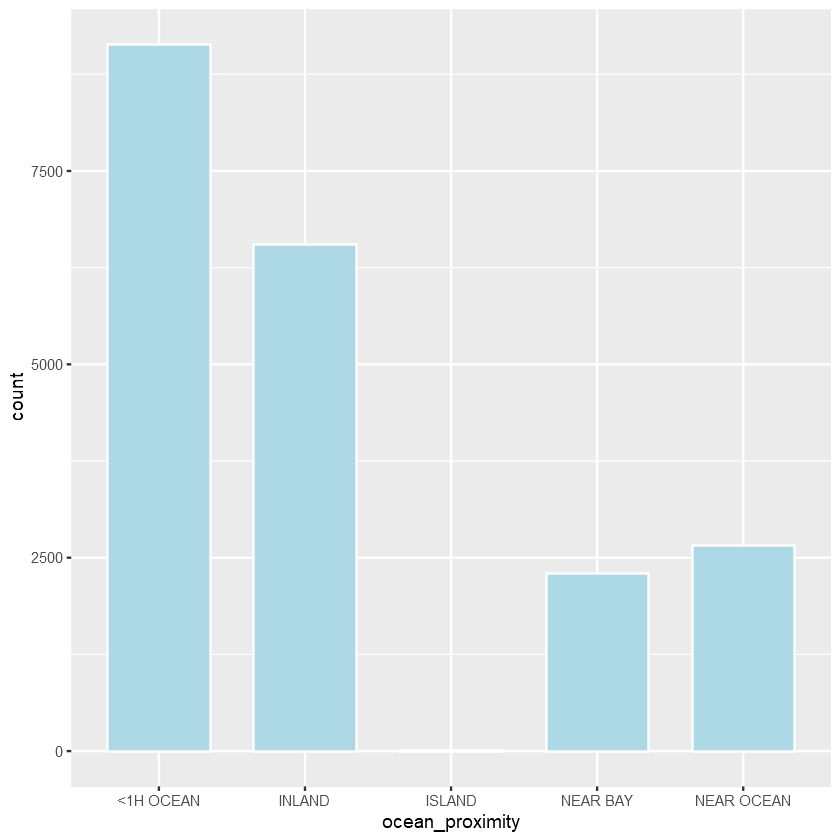

In [23]:
# Visualize the distribution of values in ocean_proximity
p7 <- ggplot(df_hp, aes(ocean_proximity)) +
        geom_bar(stat = "count", width = 0.7, color = "white", fill = "lightblue")

p7
# fig <- ggplotly(p3)
# fig

#### Observations

1. The scatterplot indicates that most expensive houses are located along the coast line, implying that the column ocean_proximity could play a important role in fitting a regression tree model.
2. The histograms and the density plots show that, except for house_median_age, most variables are right-skewed having a wide range of outliers.

In [24]:
# Check correlation between numeric variables
corr <- round(cor(df_hp[, 1:9]), 1)
head(corr)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,0.0,0.0
latitude,-0.9,1.0,0.0,0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,0.0,0.0


### (2) Correlation Analysis

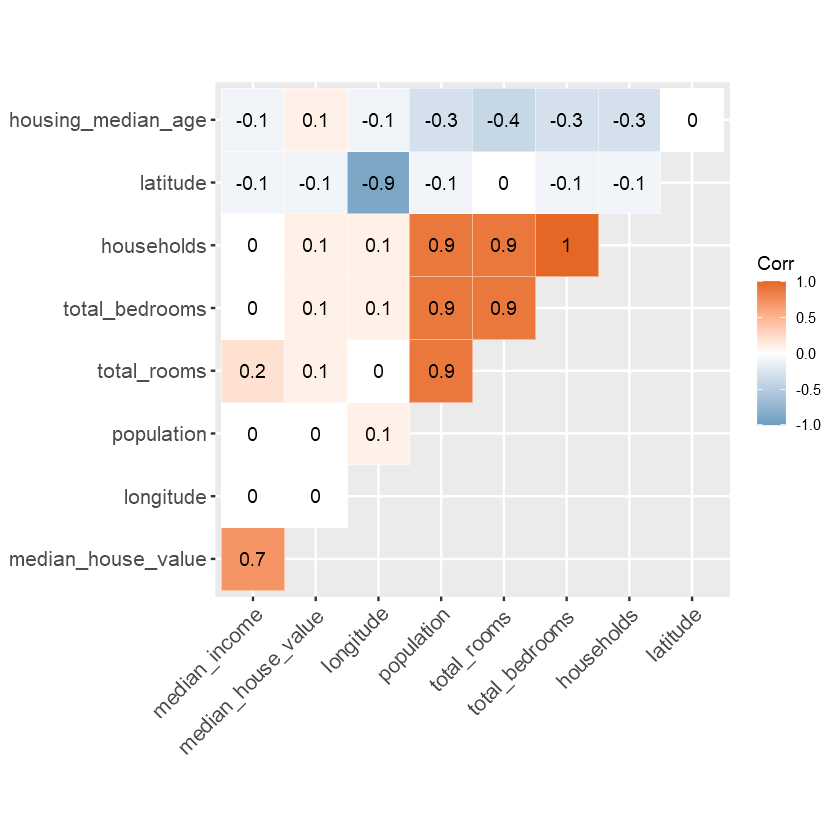

In [25]:
# Visualize correlation matrix
ggcorrplot(corr, hc.order = TRUE, type = "upper", outline.col = "white", lab = TRUE,
           ggtheme = ggplot2::theme_gray,
           color = c("#6D9EC1", "white", "#E46726"))

Looking at all predictors, we can see that only median_income indicates a strong correlation with median_house_value.

## 3. Model Building: Regression Trees
### (1) Splitting the data: Training vs. Testing

I assigned a 70% of the dataset to the trianing data and assigned a 30% to the testing data.

In [26]:
# Split the dataset into trianing data and testing data
set.seed(420)
split <- sample.split(df_hp$median_house_value, SplitRatio = 0.7)

df_train <- subset(df_hp, split == TRUE)
df_test <- subset(df_hp, split = FALSE)

In [27]:
# Summary of the column: median_house_value
summary(df_hp$median_house_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14999  119600  179700  206856  264725  500001 

### (2) Fitting Regression Tree Models

1. I generate four different regression tree models by selecting different predictors. And I fit each model to the training data and see how precisely each model predicts the median house value more than $179,700, which is the actual median house value in the original dataset.
2. I create four different regression tree models with different predictors.
    * Model 1 contains all (8) predictors: longitutde ~ median_income
    * Model 2 contains 4 predictors: median_income, ocean_proximity, longitude, latitude
    * Model 3 contains 2 predictors: median_income, ocean_proximity
    * Model 4 contains 1 predictors: median_income

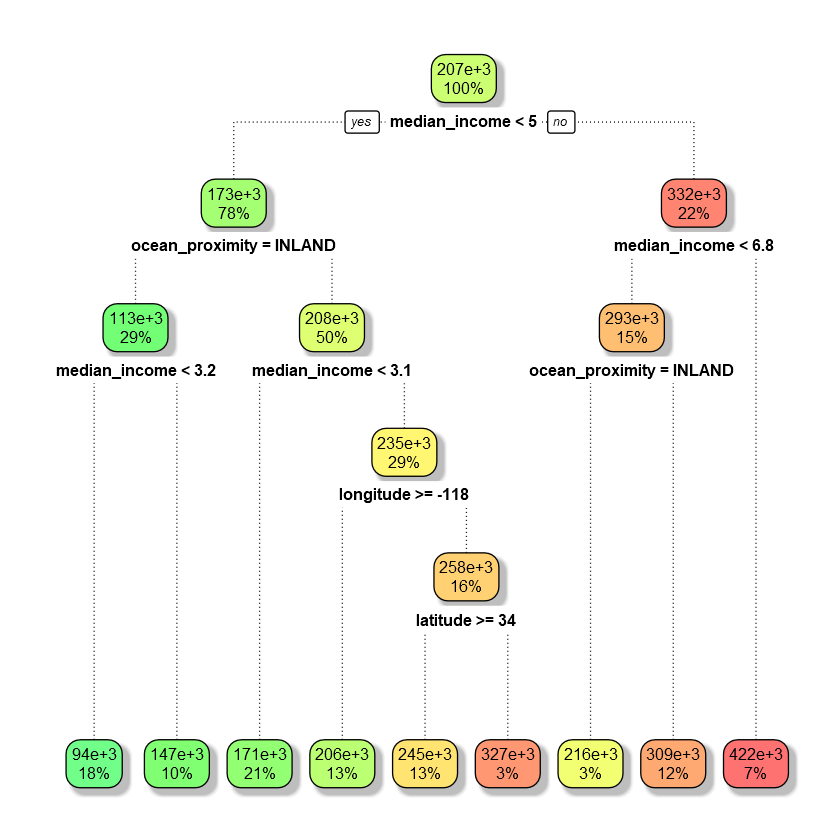

In [28]:
# parms = list(split = ""): defines the split criteria
# The default splitting method for classification is “gini”.

# Fit a model to the training dataset: df_train
mdl_1 <- rpart(median_house_value ~., data = df_train, method = "anova")

# Plot the tree
rpart.plot(mdl_1, type = 2, extra = 100, shadow.col = "grey", branch.lty = 3, box.palette = "GnYlRd")

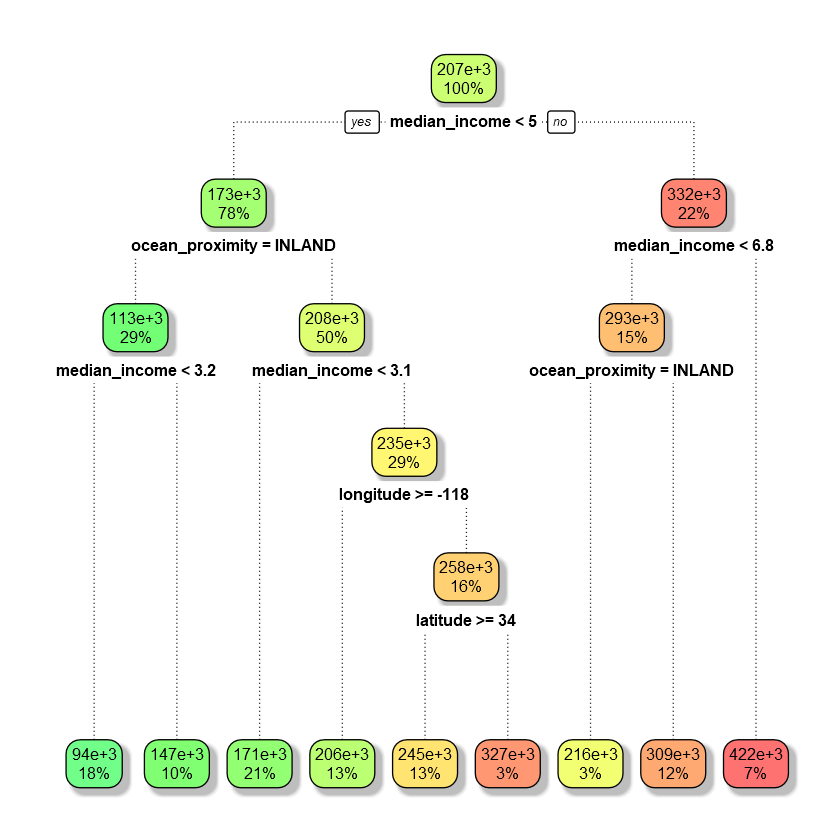

In [29]:
# Fit a model to the training dataset: df_train
mdl_2 <- rpart(median_house_value ~ median_income + ocean_proximity + latitude + longitude, 
               data = df_train, method = "anova")

# Plot the tree
rpart.plot(mdl_2, type = 2, extra = 100, shadow.col = "grey", branch.lty = 3, box.palette = "GnYlRd")

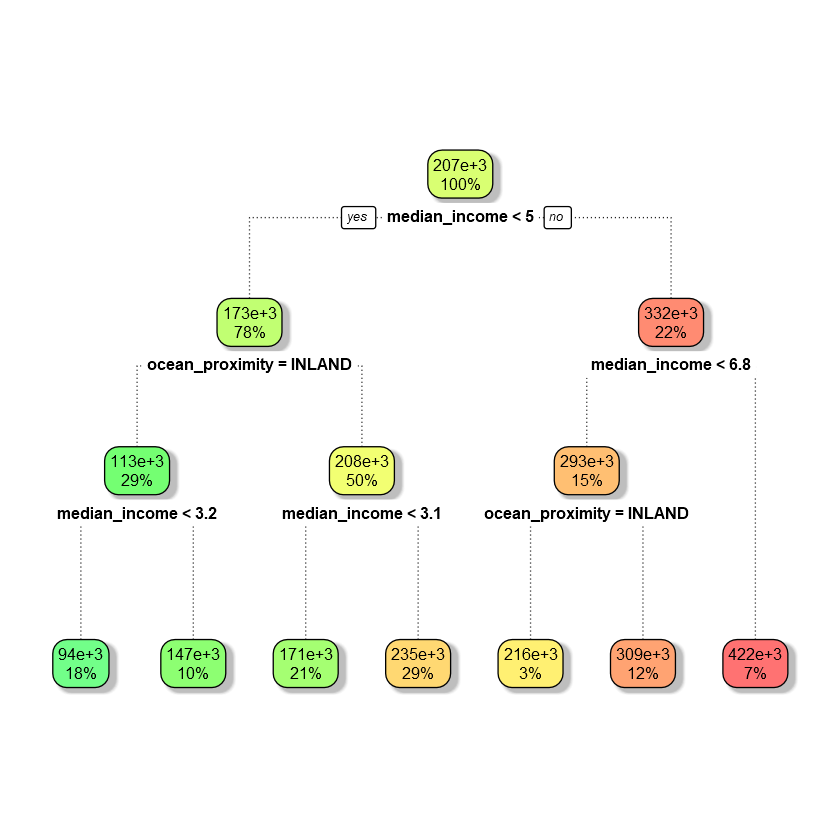

In [30]:
# Fit a model to the training dataset: df_train
mdl_3 <- rpart(median_house_value ~ median_income + ocean_proximity, 
               data = df_train, method = "anova")

# Plot the tree
rpart.plot(mdl_3, type = 2, extra = 100, shadow.col = "grey", branch.lty = 3, box.palette = "GnYlRd")

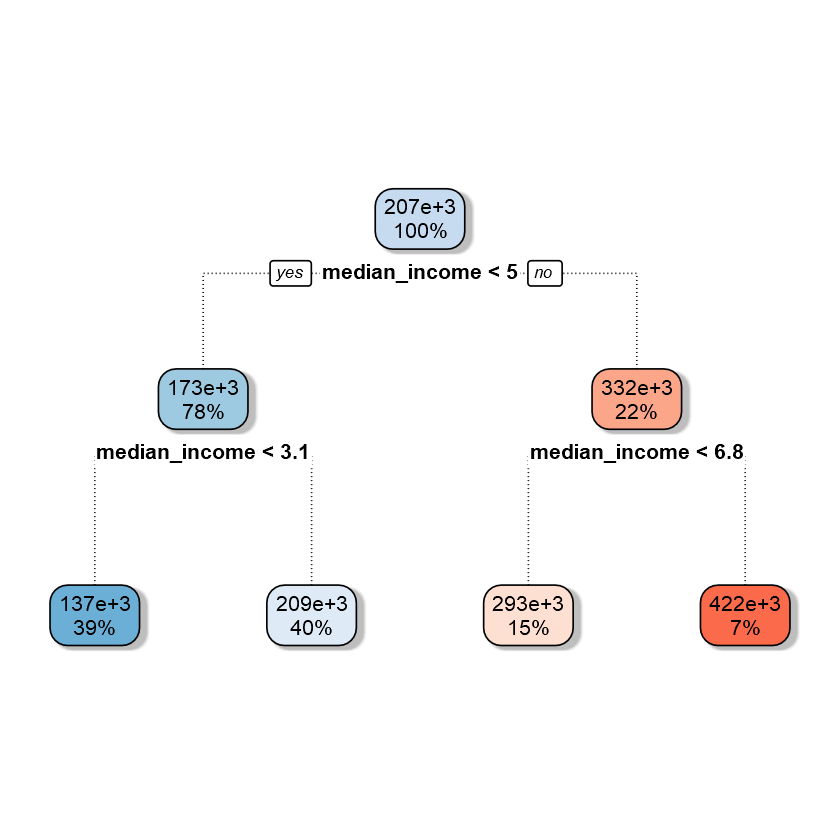

In [31]:
# Fit a model to the training dataset: df_train
mdl_4 <- rpart(median_house_value ~ median_income, 
               data = df_train, method = "anova")

# Plot the tree
rpart.plot(mdl_4, type = 2, extra = 100, shadow.col = "grey", branch.lty = 3, box.palette = "BuRd")

#### Observations

1. Model 1 and Model 2 specify that they have the same number of splits and terminal nodes, which are 8 and 9 repectively. It means that by default, rpart performs some automated tuning that selects the optimal number of subtrees. 
2. Model 3 has 6 splits and 7 terminal nodes showing a less complicate tree compared to Model 1 and Model 2.
3. Model 4 shows a small pruned tree compared to other models and it has only 3 splits and 4 terminal nodes.
    * Why?
    * It is because regression trees divide a data set into smaller subgroups by successive binary partitions based on different predictors. So, the fewer predictors a regression tree model has, the fewr split or terminal nodes the model is likely to generates.
    
#### How to interpret a regression tree?
1. For example, let's look at a regression tree in Model 4.
2. In this model, my goal is to predict the median house value based on the median income of households in the district.
    * First, all observations that have the median income of less than 50,000 USD go to the left branch, and all other observations that have the median income of more than 50,000 USD proceed to the right branch. 
    * A 78% means the proportion of the observations that proceeded to the left branch out of the entire (100%) observations. 
    * A value of 173e+3 (= 173,000 USD) shows the average median house value of the 78% observations.
    * Then, out of these 78% observations, the observations that have the median income of less than 31,000 USD go to the left branch, which consists of a 39% of the observations, and their average median house value is 137e+3, 137,000 USD.

## 4. Predictions & Model Evaluation
### (1) Generating Predictions & Visualization

In [32]:
# Make predictions with the testing dataset
mdl_1_pred <- predict(mdl_1, newdata = df_test)

# Print the head of predicted values on the first model: mdl_1
head(round(mdl_1_pred))

# Computed the sum of squared errors (SSE) 
# between actual median house values and predicted median house value by mdl_1
mdl_1_sse <- sum((mdl_1_pred - df_test$median_house_value)^2)
print(paste("SSE of the model 1: ", mdl_1_sse))
mdl_1_rmse <- RMSE(pred = mdl_1_pred, obs = df_test$median_house_value)
print(paste("RMSE of the model 1: ", mdl_1_rmse))

1      2      3      4      5      6 
421817 421817 421817 308555 245003 245003

[1] "SSE of the model 1:  113996164819444"
[1] "RMSE of the model 1:  74317.3600240351"


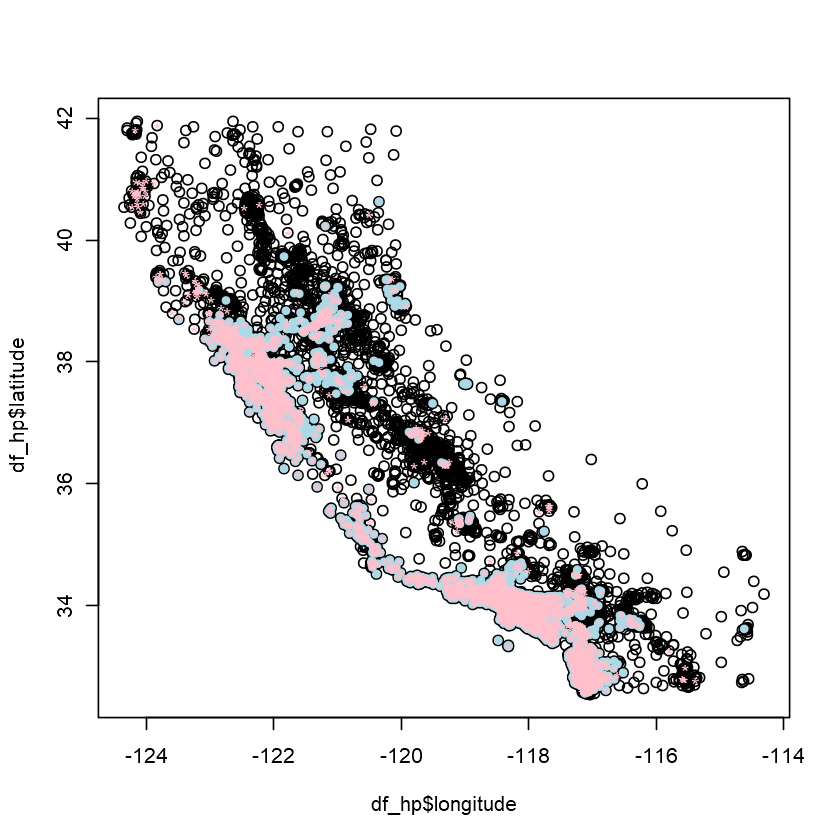

In [33]:
# Plot predicted values by a model with actual median house values
plot(df_hp$longitude, df_hp$latitude)
points(df_hp$longitude[df_hp$median_house_value >= 179700], 
       df_hp$latitude[df_hp$median_house_value >= 179700],
       col = "lightblue", pch = 20)

points(df_hp$longitude[mdl_1_pred >= 179700],
        df_hp$latitude[mdl_1_pred >= 179700],
        col = "pink", pch = "*")

In [34]:
# Make predictions with the testing dataset
mdl_2_pred <- predict(mdl_2, newdata = df_test)

# Print the head of predicted values on the first model: mdl_2
head(round(mdl_2_pred))

# Computed the sum of squared errors (SSE) 
# between actual median house values and predicted median house value by mdl_2
mdl_2_sse <- sum((mdl_2_pred - df_test$median_house_value)^2)
print(paste("SSE of the model 2: ", mdl_2_sse))
mdl_2_rmse <- RMSE(pred = mdl_2_pred, obs = df_test$median_house_value)
print(paste("RMSE of the model 2: ", mdl_2_rmse))

1      2      3      4      5      6 
421817 421817 421817 308555 245003 245003

[1] "SSE of the model 2:  113996164819444"
[1] "RMSE of the model 2:  74317.3600240351"


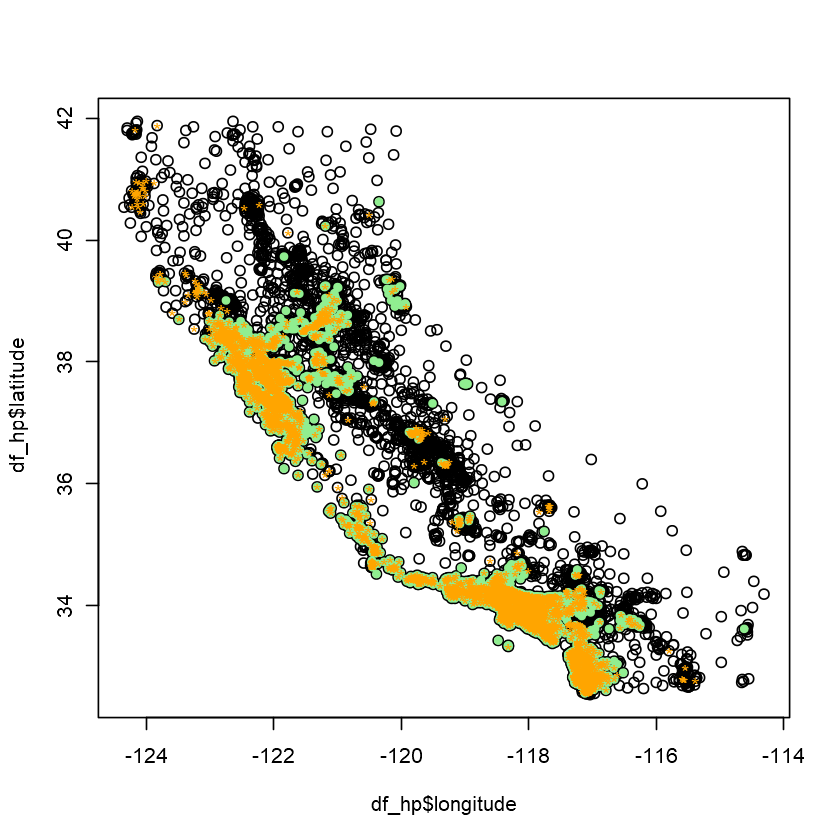

In [35]:
# Plot predicted values by a model with actual median house values
plot(df_hp$longitude, df_hp$latitude)
points(df_hp$longitude[df_hp$median_house_value >= 179700], 
       df_hp$latitude[df_hp$median_house_value >= 179700],
       col = "lightgreen", pch = 20)

points(df_hp$longitude[mdl_2_pred >= 179700],
        df_hp$latitude[mdl_2_pred >= 179700],
        col = "orange", pch = "*")

In [36]:
# Make predictions with the testing dataset
mdl_3_pred <- predict(mdl_3, newdata = df_test)

# Print the head of predicted values on the first model: mdl_3
head(round(mdl_3_pred))

# Computed the sum of squared errors (SSE) 
# between actual median house values and predicted median house value by mdl_3
mdl_3_sse <- sum((mdl_3_pred - df_test$median_house_value)^2)
print(paste("SSE of the model 3: ", mdl_3_sse))
mdl_3_rmse <- RMSE(pred = mdl_3_pred, obs = df_test$median_house_value)
print(paste("RMSE of the model 3: ", mdl_3_rmse))

1      2      3      4      5      6 
421817 421817 421817 308555 234938 234938

[1] "SSE of the model 3:  120989896958823"
[1] "RMSE of the model 3:  76563.1348126896"


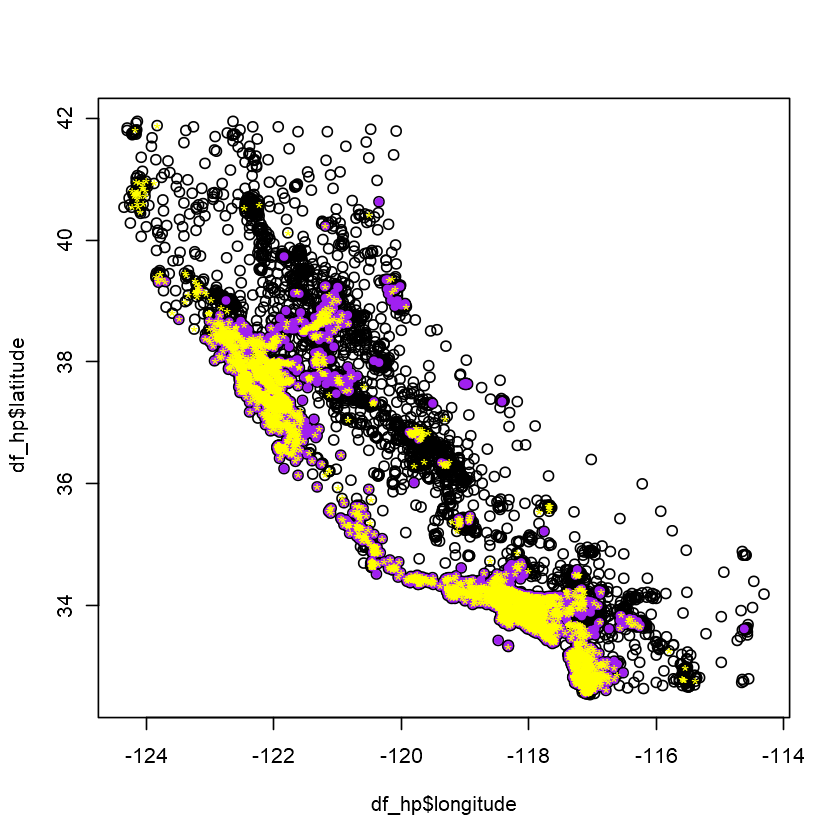

In [37]:
# Plot predicted values by a model with actual median house values
plot(df_hp$longitude, df_hp$latitude)
points(df_hp$longitude[df_hp$median_house_value >= 179700], 
       df_hp$latitude[df_hp$median_house_value >= 179700],
       col = "purple", pch = 20)

points(df_hp$longitude[mdl_3_pred >= 179700],
        df_hp$latitude[mdl_3_pred >= 179700],
        col = "yellow", pch = "*")

In [38]:
# Make predictions with the testing dataset
mdl_4_pred <- predict(mdl_4, newdata = df_test)

# Print the head of predicted values on the first model: mdl_4
head(round(mdl_4_pred))

# Computed the sum of squared errors (SSE) 
# between actual median house values and predicted median house value by mdl_4
mdl_4_sse <- sum((mdl_4_pred - df_test$median_house_value)^2)
print(paste("SSE of the model 4: ", mdl_4_sse))
mdl_4_rmse <- RMSE(pred = mdl_4_pred, obs = df_test$median_house_value)
print(paste("RMSE of the model 4: ", mdl_4_rmse))

1      2      3      4      5      6 
421817 421817 421817 292583 209021 209021

[1] "SSE of the model 4:  151962108789475"
[1] "RMSE of the model 4:  85805.0422225169"


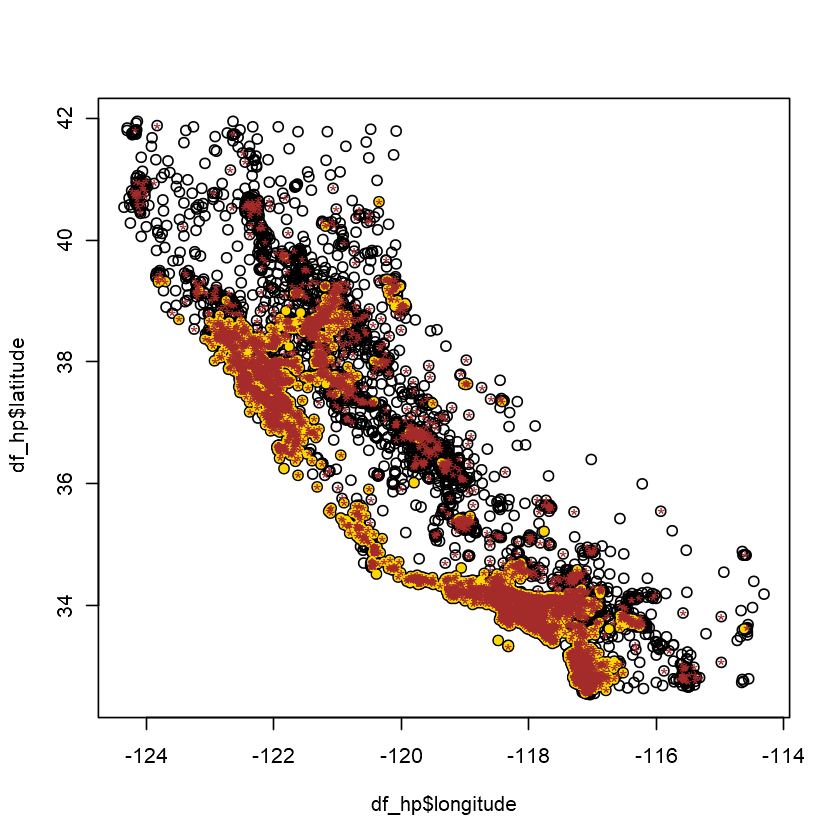

In [39]:
# Plot predicted values by a model with actual median house values
plot(df_hp$longitude, df_hp$latitude)
points(df_hp$longitude[df_hp$median_house_value >= 179700], 
       df_hp$latitude[df_hp$median_house_value >= 179700],
       col = "gold", pch = 20)

points(df_hp$longitude[mdl_4_pred >= 179700],
        df_hp$latitude[mdl_4_pred >= 179700],
        col = "brown", pch = "*")

#### In this section,
1. I computed predicted values using each regression tree model, the sum of squared errors (SSE), and the root mean square errors (RMSE).
2. I plotted predicted values of above-median house value, which is more than 179,700 USD with the actual values of above-median house value to compare them visually.

#### Observations
1. For example, let's look at the scatterplot in Model 4.
2. The values plotted with asterisk (*) in brown are the predicted values computed by the regression tree model. The model has plotted these values for every time it thinks the census tract is above median house value. Looking at them carefully, it is noticeable that the predicted (= fitted) values cover nearly all actual values plotted in gold, and they are also plotted in places where the actual values are not plotted. This can be the indication that the model might have a problem of overfitting.
3. Compared to Model 4, Model 1, 2, and 3 have plotted their predicted values that nearly cover all the actual values pretty well.

### (2) Model Performance Evaluation

There are a few indicators that specify how regression tree models perform. I will examine the sums of squared error, which equals (predicted value - actual value)^2, the root mean square error, and the cross validated error associated with CP.

In [49]:
# Create a dataframe that contains all SSEs and RMSEs from each model for comparison
mdls_sse_rmse <- c(mdl_opt_sse, mdl_opt_rmse, mdl_1_sse, mdl_1_rmse, 
                   mdl_2_sse, mdl_2_rmse, mdl_3_sse, mdl_3_rmse, mdl_4_sse, mdl_4_rmse
                   )
rnames <- c("Model Opt", "Model 1", "Model 2", "Model 3", "Model 4")
cnames <- c("SSE", "RMSE")
perf_meas <- as.data.frame(matrix(mdls_sse_rmse, byrow = TRUE, nrow = 5, 
                                   dimnames = list(rnames, cnames)))

perf_meas

,SSE,RMSE
Model Opt,1.139962e+14,74317.36
Model 1,1.139962e+14,74317.36
Model 2,1.139962e+14,74317.36
Model 3,1.209899e+14,76563.13
Model 4,1.519621e+14,85805.04


In [41]:
# Create a function that returns a minimum cp, minimum error, and nsplit for each model
get_cp <- function(x) {
    min <- which.min(x$cptable[, "xerror"])
    cp <- x$cptable[min, "CP"]
    return(cp)
}

get_nsplit <- function(x) {
    min <- which.min(x$cptable[, "xerror"])
    nsplit <- x$cptable[min, "nsplit"]
    return(nsplit)
}

get_min_error <- function(x) {
    min <- which.min(x$cptable[, "xerror"])
    error <- x$cptable[min, "xerror"]
    return(error)
}

# Create a data frame that contains all parameters from each model for comparison
mdl_1_gather <- c(get_cp(mdl_1), get_nsplit(mdl_1), get_min_error(mdl_1))
mdl_2_gather <- c(get_cp(mdl_2), get_nsplit(mdl_2), get_min_error(mdl_2))
mdl_3_gather <- c(get_cp(mdl_3), get_nsplit(mdl_3), get_min_error(mdl_3))
mdl_4_gather <- c(get_cp(mdl_4), get_nsplit(mdl_4), get_min_error(mdl_4))
mdls_gather <- c(mdl_1_gather, mdl_2_gather, mdl_3_gather, mdl_4_gather)

mdls_df <- as.data.frame(matrix(mdls_gather, byrow = TRUE, nrow = 4))
rownames(mdls_df) <- c("Model 1", "Model 2", "Model 3", "Model 4")
colnames(mdls_df) <- c("CP", "nsplit", "error")

mdls_df

,CP,nsplit,error
Model 1,0.01,8,0.4252744
Model 2,0.01,8,0.4203359
Model 3,0.01,6,0.4444255
Model 4,0.01,3,0.5540255


#### Observations
1. First, let's compare Model 1 to 4. The smaller the SSE or the RMSE is, the better the model performs. In this context, Model 1 and 2 have the smallest SSE and RMSE. Undoubtly, Model 1 and 2 equally outperform Model 3 and 4.
2. In Model 1 and 2, RMSE suggests that on average the predicted median house prices computed by each model are about 74,317 USD off from the actual median house prices.
3. Let's look at the error associated with CP. Interestingly, the error of Model 2 is the smallest and slightly smaller than that of Model 1. If asked to choose just one model to utilize, Model 2 should be chosen as the one for predictions.

## 5. Tuning

In decision tree models, tuning means to regulate hyperparameters that affect how a tree grows or how a split takes place to improve model performance. There are major hyperparameters in rpart package that we can tune, such as cost complexity (CP), minsplit, and maxdepth.

### (1) Tuning with CP parameter

#### What is CP?
CP is the complexity parameter. There is a more complex definition of cp that you can look up. Put simply, based on my understanding, cp is a parameter that helps save computing time by pruning off splits that are obviously not worthwhile. In other words, it helps find the optimal number of split to improve the model performance. In this session, I am not going to regulate the cp value, which is 0.01 by default. Rather, Let's look through how the cp comes into play in determining the optimal size of tree.

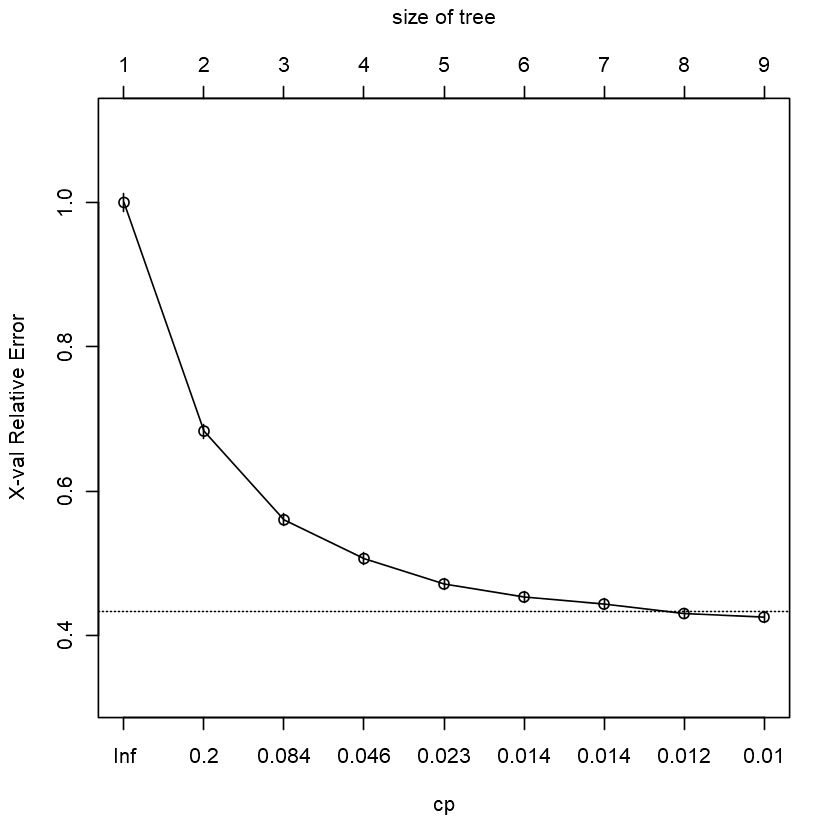

In [42]:
# Plot the cp values of Model 1
plotcp(mdl_1)

#### In the CP table of Model 1, 
1. Y-axis is cross validation error, lower x-axis is cost complexity (CP) value, and upper x-axis is the number of terminal nodes (= tree size = |T|). 
2. We find diminishing returns after 9 terminal nodes and it is noticeable the dashed line goes through the point |T| = 8.
3. Put simply, I suggest that 8 indicate the optimal number of split. But this 8 could mean something else as below:
    * Breiman et al. (1984) suggested that in actual practice, its common to instead use the smallest tree within 1 standard deviation of the minimum cross validation error (aka the 1-SE rule). Thus, we could use a tree with 8 terminal nodes and reasonably expect to experience similar results within a small margin of error.

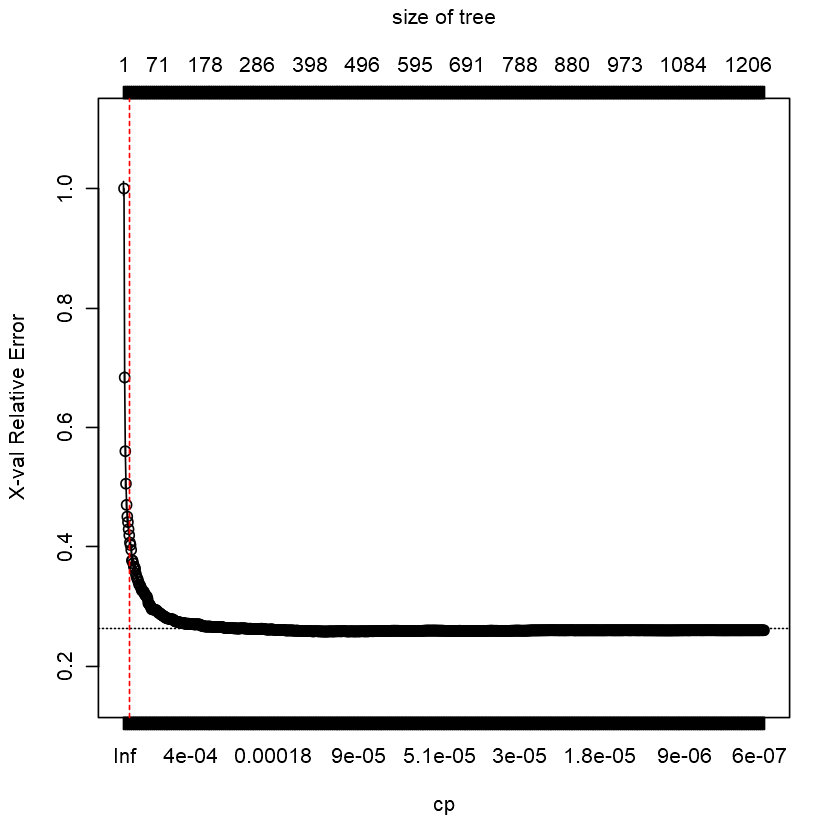

In [43]:
# Generate a full tree by using cp value of 0
mdl_1_pr <- rpart(median_house_value ~., data = df_train, method = "anova",
                  control = list(cp = 0, xval = 10))

plotcp(mdl_1_pr)
abline(v = 9, col = "red", lty = "dashed")

#### Observations
1. To illustrate the point of selecting a tree with 9 terminal nodes (or 8 if you go by the 1- SE rule), I forced rpart to generate a full tree using cp = 0. After 9 terminal nodes, the red vertical dashed line, we can observe the diminishing returns in error reduction as the tree grows deeper.
2. So, by default, as mentioned eariler, rpart is performing some automated tuning, with an optimal subtree of 8 splits, 9 terminal nodes, and a cross validated error of 0.425.

### (2) Tuning with Other Hyperparameters

1. As mentioned above, we can perform additional tuning to try improve model performance by regulating minsplit and maxdepth. 
    * minsplit is the minimum number of data points required to attempt a split before it is forced to create a terminal node. The default is 20. Making this smaller allows for terminal nodes that may contain only a handful of observations to create the predicted values.
    * maxdepth is the maximum number of internal nodes between the root node and the terminal nodes. The default is 30, which is quite liberal and allows for fairly large trees to be built.
    
#### Performing Grid Search for Optimal Hyperparameter Settings
In this section, I performed a grid search to automatically find a range of differently tuned models to identify the optimal hyperparameter settings.

In [44]:
# Create a hyper-parameter grid
hyper_grid <- expand.grid(
                    minsplit = seq(5, 20, 1),
                    maxdepth = seq(8, 15, 1)
                    )

head(hyper_grid)

# Total number of combinations
nrow(hyper_grid)

minsplit,maxdepth
5,8
6,8
7,8
8,8
9,8
10,8


[1] 128

In [45]:
# Set up a for loop and iterate through each minsplit and maxdepth combination
# and save each model into its own list item

mdls <- list()

for (i in 1:nrow(hyper_grid)) {
    
    # Get minsplit, maxdepth values at row i
    minsplit <- hyper_grid$minsplit[i]
    maxdepth <- hyper_grid$maxdepth[i]
    
    # Train a model and store in the list
    mdls[[i]] <- rpart(
        median_house_value ~., 
        data = df_train, 
        method = "anova",
        control = list(minsplit = minsplit, maxdepth = maxdepth)
    )
}

In [46]:
# Create a function to extract the minimum error 
# associated with the optimal cost complexity value for each model

# function to get optimal cp
get_cp <- function(x) {
    min <- which.min(x$cptable[, "xerror"])
    cp <- x$cptable[min, "CP"]
}

# function to get minimum error
get_min_error <- function(x) {
    min <- which.min(x$cptable[, "xerror"])
    xerror <- x$cptable[min, "xerror"]
}

hyper_grid %>%
    mutate(
        cp = purrr::map_dbl(mdls, get_cp),
        error = purrr::map_dbl(mdls, get_min_error)
        ) %>%
    arrange(error) %>%
    top_n(-5, wt = error)

minsplit,maxdepth,cp,error
15,15,0.01,0.4195128
19,10,0.01,0.4216537
18,11,0.01,0.4217147
12,10,0.01,0.4218135
5,9,0.01,0.4218618


In [47]:
# Apply the final optimal model on the training dataset
mdl_opt <- rpart(median_house_value ~., data = df_train, method = "anova",
                     control = list(minsplit = 15, maxdepth = 15, cp = 0.01))

# Make prediction on the testing dataset
mdl_opt_pred <- predict(mdl_opt, newdata = df_test)

# Get SSE and RMSE for comparison with the existing models
mdl_opt_sse <- sum((mdl_opt_pred - df_test$median_house_value)^2)
print(paste("SSE of the optimal model: ", mdl_opt_sse))
mdl_opt_rmse <- RMSE(pred = mdl_opt_pred, obs = df_test$median_house_value)
print(paste("RMSE of the optimal model: ", mdl_opt_rmse))

[1] "SSE of the optimal model:  113996164819444"
[1] "RMSE of the optimal model:  74317.3600240351"


#### Observations
1. The grid search specified the optimal hyperparameter settings that yield the minimum cross validated error. 
    * minsplit = 15, maxdepth = 15, and cp = 0.01
2. Let's compare the error of "the optimal model" with that of Model 1. We see that the optimal model's error has a slightly lower value of 0.4195 than that of Model 1, 0.4252, meaning that we just imporved our model a bit by reducing the error.

### <a href='#Table of Contents'>[Move to Table of Contents]</a>